### Exercise 2
Consider the following function (where **x** = (x, y)):

$$
f(\mathbf{x}) = 5x^2 - 6xy + 5y^2 + 4x + 4y \tag{1}
$$

1. Plot the function.

2. Compute analytically the value **x**<sub>min</sub> where the function attains its minimum value and  f(**x**<sub>min</sub>).

3. Write (1) as:

$$
f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^T H \mathbf{x} + \mathbf{d}^T \mathbf{x} + c \tag{2}
$$

Write explicitly the expressions for the matrix **H**, the vector **d**, and the constant **c**. What is **H**?

4. Consider the gradient descent (GD) method:

$$
\mathbf{x}^{k+1} = \mathbf{x}^k - \alpha \nabla f(\mathbf{x}^k) \tag{3}
$$

where $\alpha$ is the learning rate. Combining (2) and (3), find the expression of $\alpha_{\text{max}}$ (maximum value of $\alpha$) such that the GD method is convergent. *(Hint: remember that for an iterative method to be convergent, the spectral radius $\rho$ of the iteration matrix must satisfy $|\rho| < 1$.)*

5. Find the value of $\alpha_{\text{max}}$ for the GD method applied to (1).

6. Implement the GD method and verify the conclusion drawn at the previous point. Use the stopping criterion $E < \epsilon$ where $E$ is the absolute value of the difference of the last two functional values, i.e.,

$$
E = |f(\mathbf{x}^{k+1}) - f(\mathbf{x}^k)| \tag{4}
$$

and $\epsilon$ is the required tolerance (take $\epsilon = 10^{-3}$). Moreover, set the maximum number of iterations to 200 and the initial guess equal to $\mathbf{x}^0 = (-5, 7)$.


Consider the following function (where **x** = (x, y)):

$$
f(\mathbf{x}) = 5x^2 - 6xy + 5y^2 + 4x + 4y \tag{1}
$$

1. Plot the function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import jax

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

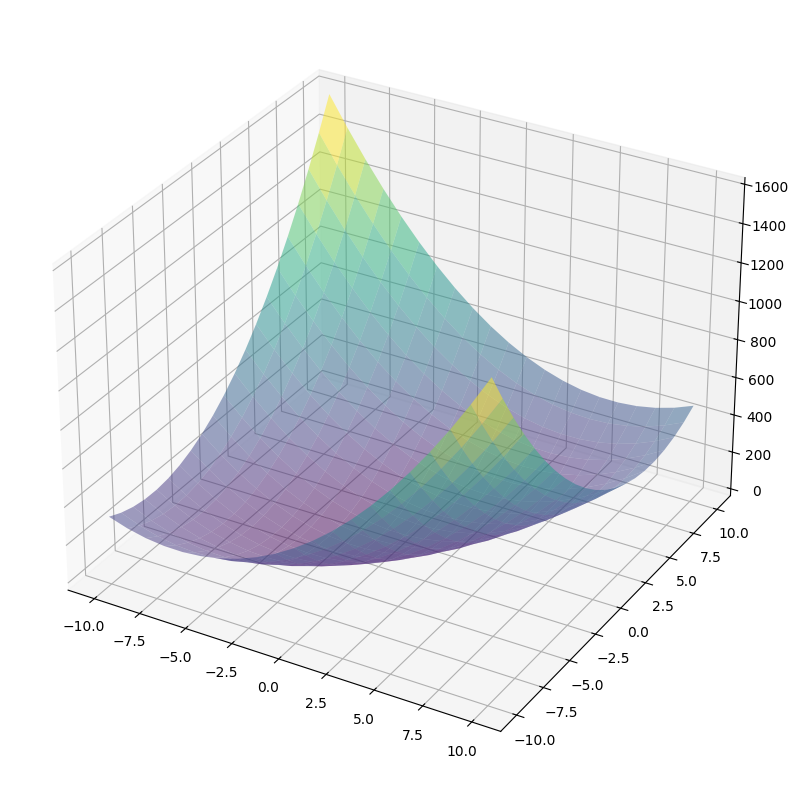

In [11]:
f = lambda x,y: 5*x**2 - 6*x*y + 5*y**2 + 4*x + 4*y
# Definisce una funzione lambda che calcola un'espressione quadratica in due variabili x e y.


#np.linspace(start,stop,num)
# genera num punti equidistanti inclusi gli estremi start e stop, quindi l'intervallo viene diviso
# in 'num - 1' segmenti uguali
x = np.linspace(-10,10,21)
y = np.linspace(-10,10,21)
# Genera due array di numeri con 21 valori equidistanti compresi tra -10 e 10.
# Questi array rappresentano i punti lungo gli assi x e y che verranno utilizzati
# per valutare la funzione f. In pratica, si sta discretizzando l'intervallo [-10, 10]
# in 21 punti per ciascuna delle variabili x e y.


fig = plt.figure(figsize=(10,10))
# Crea una nuova figura con dimensioni 10x10 pollici.

ax = fig.add_subplot(111, projection='3d')
# Aggiunge un singolo subplot alla figura (111 indica 1x1 griglia, prima posizione) con una proiezione 3D.

ax.plot_surface(*np.meshgrid(x, y), f(*np.meshgrid(x, y)), cmap='viridis', alpha=0.5)
# Crea una superficie 3D usando i valori della griglia ottenuti da x e y, e calcola f(x, y) su questa griglia.
# 'cmap='viridis'' specifica la mappa di colori utilizzata per colorare la superficie.
# 'alpha=0.5' rende la superficie semi-trasparente.
x

2. Compute analytically the value **x**<sub>min</sub> where the function attains its minimum value and  f(**x**<sub>min</sub>).

To find the point $ x_{\text{min}} $ where the function $ f(\mathbf{x}) $ attains its minimum value, we follow these steps:

#### 1. Calculate the gradient of the function $ f(\mathbf{x}) $:
The gradient $ \nabla f(\mathbf{x}) $ is a vector that contains the partial derivatives of the function with respect to each variable:

$$
\nabla f(\mathbf{x}) = \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right)
$$

Let's compute the partial derivatives of $ f(\mathbf{x}) $:

$$
\frac{\partial f}{\partial x} = 10x - 6y + 4
$$
$$
\frac{\partial f}{\partial y} = -6x + 10y + 4
$$

Thus, the gradient is:
$$
\nabla f(\mathbf{x}) = \left(10x - 6y + 4, -6x + 10y + 4\right)
$$

#### 2. Find the stationary point:
The point $ x_{\text{min}} $ is found by solving the system of equations obtained by setting the gradient to zero:

$$
10x - 6y + 4 = 0
$$
$$
-6x + 10y + 4 = 0
$$

Let's solve this system:

- From the first equation, solve for $ x $:
  $$
  10x = 6y - 4 \implies x = \frac{6y - 4}{10} = \frac{3y - 2}{5}
  $$
- Substitute this into the second equation:
  $$
  -6\left(\frac{3y - 2}{5}\right) + 10y + 4 = 0
  $$
  $$
  \Rightarrow -\frac{18y - 12}{5} + 10y + 4 = 0
  $$
  Multiply everything by 5 to clear the denominator:
  $$
  -(18y - 12) + 50y + 20 = 0
  $$
  $$
  -18y + 12 + 50y + 20 = 0 \implies 32y + 32 = 0 \implies y = -1
  $$
- Now substitute $ y = -1 $ into the expression for $ x $:
  $$
  x = \frac{3(-1) - 2}{5} = \frac{-3 - 2}{5} = -1
  $$

So, the stationary point is $ \mathbf{x}_{\text{min}} = (-1, -1) $.

#### 3. Determine the nature of the stationary point:
To confirm that this point is a minimum, we can examine the sign of the second derivatives (using the Hessian matrix), but since the function is a quadratic form with positive coefficients on the diagonal of the Hessian, this point is a global minimum.

#### 4. Calculate $ f(x_{\text{min}}) $:
Finally, substituting $ x = -1 $ and $ y = -1 $ into the function:

$$
f(-1, -1) = 5(-1)^2 - 6(-1)(-1) + 5(-1)^2 + 4(-1) + 4(-1)
$$
$$
= 5(1) - 6(1) + 5(1) - 4 - 4 = 5 - 6 + 5 - 4 - 4 = -4
$$

Thus, $ x_{\text{min}} = (-1, -1) $ and $ f(x_{\text{min}}) = -4 $.


In [12]:
print(x, y)
print(f(-1, -1))
print(x[np.argmin(f(x, y))], y[np.argmin(f(x, y))])
# 1. np.argmin(f(x, y)) calcola l'indice dell'elemento in cui la funzione f(x, y) raggiunge il valore minimo.
#    Questo indice rappresenta la posizione nell'array di output di f(x, y) dove si trova il valore minimo.
# 2. x[np.argmin(f(x, y))] seleziona il valore corrispondente di x all'indice ottenuto dal punto 1.
#    Questo valore di x è quello per cui f(x, y) è minima.
# 3. y[np.argmin(f(x, y))] seleziona il valore corrispondente di y all'indice ottenuto dal punto 1.
#    Questo valore di y è quello per cui f(x, y) è minima.


[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.] [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
-4
-1.0 -1.0


## 3. Write (1) as

$$
f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T \mathbf{H} \mathbf{x} + \mathbf{d}^T \mathbf{x} + c.
$$

Write explicitly the expressions for the matrix $\mathbf{H}$, the vector $\mathbf{d}$, and the constant $c$. What is $\mathbf{H}$?

Let's break down the process of converting the function $ f(\mathbf{x}) = 5x^2 - 6xy + 5y^2 + 4x + 4y $ into the form:

$$
f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T H \mathbf{x} + \mathbf{d}^T \mathbf{x} + c
$$

### Step 1: Understanding the Quadratic Form

The function $ f(\mathbf{x}) $ contains terms involving $ x^2 $, $ xy $, $ y^2 $, $ x $, and $ y $. These terms can be classified into quadratic terms, linear terms, and the constant term.

- **Quadratic Terms:** $ 5x^2 - 6xy + 5y^2 $
- **Linear Terms:** $ 4x + 4y $
- **Constant Term:** In this case, there is no explicit constant term, so it's $ 0 $.

### Step 2: Expressing Quadratic Terms Using a Matrix

The general form of the quadratic terms can be written as:

$$
\frac{1}{2} \mathbf{x}^T H \mathbf{x}
$$

where $ \mathbf{x} = \begin{pmatrix} x \\ y \end{pmatrix} $ is a vector, and $ H $ is the Hessian matrix. 

The expansion of this expression is:

$$
\frac{1}{2} \begin{pmatrix} x & y \end{pmatrix} \begin{pmatrix} H_{11} & H_{12} \\ H_{21} & H_{22} \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix}
$$

Expanding the matrix multiplication, we get:

$$
\frac{1}{2} \left( H_{11}x^2 + H_{12}xy + H_{21}xy + H_{22}y^2 \right)
$$

Given that $ H $ is symmetric, $ H_{12} = H_{21} $, the expression simplifies to:

$$
\frac{1}{2} \left( H_{11}x^2 + 2H_{12}xy + H_{22}y^2 \right)
$$

### Step 3: Matching the Coefficients

Now, let's compare this with the quadratic terms in $ f(\mathbf{x}) = 5x^2 - 6xy + 5y^2 + 4x + 4y $:

- The coefficient of $ x^2 $ in $ f(\mathbf{x}) $ is 5. Since $ \frac{1}{2} H_{11} x^2 $ corresponds to this term, we have $ \frac{1}{2} H_{11} = 5 $, giving $ H_{11} = 10 $.
- The coefficient of $ y^2 $ in $ f(\mathbf{x}) $ is 5. Similarly, $ \frac{1}{2} H_{22} y^2 $ gives $ \frac{1}{2} H_{22} = 5 $, so $ H_{22} = 10 $.
- The coefficient of $ xy $ in $ f(\mathbf{x}) $ is -6. Since $ \frac{1}{2} \times 2H_{12} \times xy = H_{12}xy $, and the coefficient of $ xy $ is -6, we have $ H_{12} = -6 $.

So, the Hessian matrix $ H $ is:

$$
H = \begin{pmatrix} 
10 & -6 \\
-6 & 10 
\end{pmatrix}
$$

### Step 4: Expressing Linear Terms Using a Vector

The linear terms $ 4x + 4y $ can be expressed in the form $ \mathbf{d}^T \mathbf{x} $ 
$$
\mathbf{d} = \begin{pmatrix} 4 \\ 4 \end{pmatrix}
$$

Thus, $ \mathbf{d}^T \mathbf{x} = 4x + 4y $.

### Step 5: Identifying the Constant Term

There is no standalone constant term in the original function, so $ c = 0 $

### Final Expression

So, we have the final expression:

$$
f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T H \mathbf{x} + \mathbf{d}^T \mathbf{x} + c
$$

where:

$$
H = \begin{pmatrix} 
10 & -6 \\
-6 & 10 
\end{pmatrix}, \quad
\mathbf{d} = \begin{pmatrix} 4 \\ 4 \end{pmatrix}, \quad
c = 0
$$

In [13]:
import jax.numpy as jnp
import jax

def f(x):
    c = 0
    dt = np.array([4, 4])
    H = np.array([[10, -6], [-6, 10]]) # Hessian matrix
    return x.T @ H @ x + dt.T @ x + c

f_jit = jax.jit(f) # jit compilation makes everything faster

4. Consider the gradient descent (GD) method:

$$
\mathbf{x}^{k+1} = \mathbf{x}^k - \alpha \nabla f(\mathbf{x}^k) \tag{3}
$$

where $\alpha$ is the learning rate. Combining (2) and (3), find the expression of $\alpha_{\text{max}}$ (maximum value of $\alpha$) such that the GD method is convergent. *(Hint: remember that for an iterative method to be convergent, the spectral radius $\rho$ of the iteration matrix must satisfy $|\rho| < 1$.)*

### Detailed Explanation

The problem asks to find the maximum value of the learning rate $ \alpha $ (denoted as $ \alpha_{\text{max}} $) such that the Gradient Descent (GD) method is convergent. The Gradient Descent update rule is given by:

$$
\mathbf{x}^{k+1} = \mathbf{x}^k - \alpha \nabla f(\mathbf{x}^k)
$$

Here, $ \alpha $ is the learning rate, and $ \nabla f(\mathbf{x}^k) $ is the gradient of the function $ f(\mathbf{x}) $ at iteration $ k $.

### Step 1: Understanding the Convergence Condition

For the GD method to converge, the spectral radius $ \rho $ of the iteration matrix must satisfy:

$$
|\rho| < 1
$$

The spectral radius $ \rho $ of a matrix is the largest absolute value of its eigenvalues. In the context of gradient descent, the iteration matrix depends on the Hessian matrix $ H $ of the function $ f(\mathbf{x}) $.

### Step 2: Expressing the Gradient

The gradient of the quadratic function $ f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T H \mathbf{x} + \mathbf{d}^T \mathbf{x} + c $ is given by:

$$
\nabla f(\mathbf{x}) = H \mathbf{x} + \mathbf{d}
$$

For simplicity, let's focus on the homogeneous case where $ \mathbf{d} = \mathbf{0} $. Then:

$$
\nabla f(\mathbf{x}) = H \mathbf{x}
$$

Substituting this into the update rule:

$$
\mathbf{x}^{k+1} = \mathbf{x}^k - \alpha H \mathbf{x}^k
$$

This can be rearranged as:

$$
\mathbf{x}^{k+1} = \left( I - \alpha H \right) \mathbf{x}^k
$$

Here, $ I $ is the identity matrix. The iteration matrix is therefore $ I - \alpha H $.

### Step 3: Finding the Spectral Radius

For convergence, the spectral radius of $ I - \alpha H $ must satisfy:

$$
|\rho(I - \alpha H)| < 1
$$

The eigenvalues of the iteration matrix $ I - \alpha H $ are of the form $ 1 - \alpha \lambda_i $, where $ \lambda_i $ are the eigenvalues of the Hessian matrix $ H $.

For convergence:

$$
|1 - \alpha \lambda_i| < 1 \quad \text{for all } i
$$

This inequality can be split into two conditions:

$$
-1 < 1 - \alpha \lambda_i < 1
$$

This simplifies to:

$$
0 < \alpha \lambda_i < 2
$$

For the largest eigenvalue $ \lambda_{\text{max}} $, the maximum value of $ \alpha $ is:

$$
\alpha_{\text{max}} = \frac{2}{\lambda_{\text{max}}}
$$

### Step 4: Conclusion

The maximum value of the learning rate $ \alpha $ that ensures convergence of the gradient descent method is:

$$
\alpha_{\text{max}} = \frac{2}{\lambda_{\text{max}}}
$$

where $ \lambda_{\text{max}} $ is the largest eigenvalue of the Hessian matrix $ H $.


In [14]:
# Eigenvalues of the Hessian matrix H
H = jnp.array([[10, -6], [-6, 10]])
eigenvalues = jnp.linalg.eigvals(H)

# Maximum eigenvalue of H
lambda_max = jnp.max(eigenvalues)

# Maximum learning rate for convergence
alpha_max = 2 / lambda_max

print(f"Maximum learning rate α_max for convergence: {alpha_max}")

Maximum learning rate α_max for convergence: (0.125+0j)
